# Social Media Data Sentiment Analysis

In [86]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import re
from nltk.corpus import stopwords
import string

## Exploratory Data Analysis (EDA)

In [87]:
df = pd.read_csv('sentimentdataset.csv')

In [88]:
df.head(5)

,Unnamed: 0.1,Unnamed: 0,Text,Sentiment,Timestamp,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour
0,0,0,Enjoying a beautiful day at the park! ...,Positive,2023-01-15 12:30:00,User123,Twitter,#Nature #Park,15.0,30.0,USA,2023,1,15,12
1,1,1,Traffic was terrible this morning. ...,Negative,2023-01-15 08:45:00,CommuterX,Twitter,#Traffic #Morning,5.0,10.0,Canada,2023,1,15,8
2,2,2,Just finished an amazing workout! 💪 ...,Positive,2023-01-15 15:45:00,FitnessFan,Instagram,#Fitness #Workout,20.0,40.0,USA,2023,1,15,15
3,3,3,Excited about the upcoming weekend getaway! ...,Positive,2023-01-15 18:20:00,AdventureX,Facebook,#Travel #Adventure,8.0,15.0,UK,2023,1,15,18
4,4,4,Trying out a new recipe for dinner tonight. ...,Neutral,2023-01-15 19:55:00,ChefCook,Instagram,#Cooking #Food,12.0,25.0,Australia,2023,1,15,19


In [89]:
df['Sentiment'].value_counts()

 Positive           44
 Joy                42
 Excitement         32
 Neutral            14
 Contentment        14
                    ..
 Adrenaline          1
 Harmony             1
 ArtisticBurst       1
 Radiance            1
 Elegance            1
Name: Sentiment, Length: 279, dtype: int64

In [90]:
len(df['Sentiment'].value_counts())

279

In [91]:
first_col = df.columns[0]
second_col = df.columns[1]

print(df[first_col].value_counts())
print('\n')
print(df[second_col].value_counts())

0      1
482    1
484    1
485    1
486    1
      ..
246    1
247    1
248    1
249    1
732    1
Name: Unnamed: 0.1, Length: 732, dtype: int64


0      1
486    1
488    1
489    1
490    1
      ..
250    1
251    1
252    1
253    1
736    1
Name: Unnamed: 0, Length: 732, dtype: int64


In [92]:
df.drop(first_col, axis=1, inplace=True)
df.drop(second_col, axis=1, inplace=True)

df.head()

,Text,Sentiment,Timestamp,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour
0,Enjoying a beautiful day at the park! ...,Positive,2023-01-15 12:30:00,User123,Twitter,#Nature #Park,15.0,30.0,USA,2023,1,15,12
1,Traffic was terrible this morning. ...,Negative,2023-01-15 08:45:00,CommuterX,Twitter,#Traffic #Morning,5.0,10.0,Canada,2023,1,15,8
2,Just finished an amazing workout! 💪 ...,Positive,2023-01-15 15:45:00,FitnessFan,Instagram,#Fitness #Workout,20.0,40.0,USA,2023,1,15,15
3,Excited about the upcoming weekend getaway! ...,Positive,2023-01-15 18:20:00,AdventureX,Facebook,#Travel #Adventure,8.0,15.0,UK,2023,1,15,18
4,Trying out a new recipe for dinner tonight. ...,Neutral,2023-01-15 19:55:00,ChefCook,Instagram,#Cooking #Food,12.0,25.0,Australia,2023,1,15,19


In [93]:
df['Platform'].value_counts()

 Instagram     258
 Facebook      231
 Twitter       128
 Twitter       115
Name: Platform, dtype: int64

In [52]:
sentiment_count = df['Platform'].value_counts().to_list()
updated_twitter_count = sentiment_count[2] + sentiment_count[3]
sentiment_count.pop()
sentiment_count.pop()
sentiment_count.append(updated_twitter_count)

sentiment_count

[258, 231, 243]

In [94]:
df['Platform'].unique()

array([' Twitter  ', ' Instagram ', ' Facebook ', ' Twitter '],
      dtype=object)

In [95]:
df['Platform'] = df['Platform'].map(lambda x: x.strip())

df.head()

,Text,Sentiment,Timestamp,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour
0,Enjoying a beautiful day at the park! ...,Positive,2023-01-15 12:30:00,User123,Twitter,#Nature #Park,15.0,30.0,USA,2023,1,15,12
1,Traffic was terrible this morning. ...,Negative,2023-01-15 08:45:00,CommuterX,Twitter,#Traffic #Morning,5.0,10.0,Canada,2023,1,15,8
2,Just finished an amazing workout! 💪 ...,Positive,2023-01-15 15:45:00,FitnessFan,Instagram,#Fitness #Workout,20.0,40.0,USA,2023,1,15,15
3,Excited about the upcoming weekend getaway! ...,Positive,2023-01-15 18:20:00,AdventureX,Facebook,#Travel #Adventure,8.0,15.0,UK,2023,1,15,18
4,Trying out a new recipe for dinner tonight. ...,Neutral,2023-01-15 19:55:00,ChefCook,Instagram,#Cooking #Food,12.0,25.0,Australia,2023,1,15,19


In [96]:
df['Platform'].unique()

array(['Twitter', 'Instagram', 'Facebook'], dtype=object)

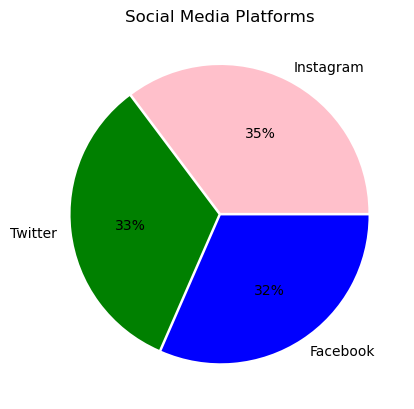

In [97]:
instagram = df.loc[df['Platform'] == 'Instagram'].count()[0]
twitter = df.loc[df['Platform'] == 'Twitter'].count()[0]
facebook = df.loc[df['Platform'] == 'Facebook'].count()[0]

labels = ['Instagram', 'Twitter', 'Facebook']
colors = ['Pink', 'Green', 'Blue']
explode = (0.01, 0.01, 0.01)

plt.title('Social Media Platforms')
plt.pie([instagram, twitter, facebook], labels = labels, colors = colors, autopct = '%0.0f%%', explode = explode)
plt.show()

In [98]:
df['Country'].value_counts()

 USA               59
 USA               55
 UK                49
 Canada            44
 Australia         41
                   ..
 Netherlands        1
 USA                1
 Germany            1
 France             1
 USA                1
Name: Country, Length: 115, dtype: int64

In [99]:
df['Country'].unique()

array([' USA      ', ' Canada   ', ' USA        ', ' UK       ',
       ' Australia ', ' India    ', ' USA    ', 'USA', ' Canada    ',
       ' USA       ', ' USA ', ' Canada  ', ' UK ', ' India     ',
       ' Canada ', ' UK        ', ' India ', ' UK   ', ' UK         ',
       ' USA     ', ' Canada     ', ' USA          ', ' India      ',
       ' Australia  ', ' UK           ', ' Canada       ',
       ' Australia   ', ' Australia    ', ' UK            ', ' USA   ',
       ' India       ', ' UK          ', ' USA  ', ' UK      ',
       ' Canada      ', ' India   ', ' Canada          ',
       ' India        ', ' Australia     ', ' Canada        ',
       ' India         ', ' USA           ', ' USA               ',
       ' Canada            ', ' UK                ',
       ' India              ', ' Australia          ',
       ' France            ', ' Brazil            ',
       ' Japan             ', ' Greece            ',
       ' India             ', ' Brazil           ', ' Franc

In [100]:
df['Country'] = df['Country'].map(lambda x: x.strip())

print(df['Country'].unique())
print('\n')
print(len(df['Country'].unique()))

['USA' 'Canada' 'UK' 'Australia' 'India' 'France' 'Brazil' 'Japan'
 'Greece' 'Germany' 'Sweden' 'Italy' 'Netherlands' 'South Africa' 'Spain'
 'Portugal' 'Switzerland' 'Austria' 'Belgium' 'Denmark' 'Czech Republic'
 'Jordan' 'Peru' 'Maldives' 'China' 'Cambodia' 'Norway' 'Colombia'
 'Ireland' 'Jamaica' 'Kenya' 'Scotland' 'Thailand']


33


### Data Visualization

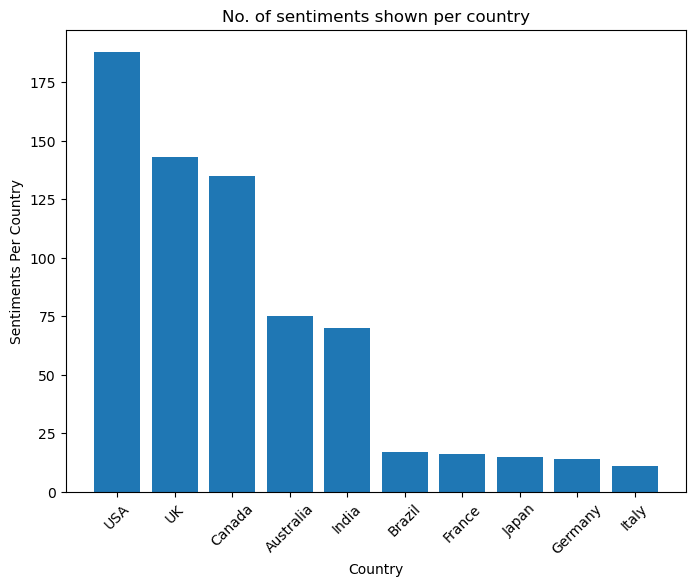

In [330]:
country_names = df['Country'].value_counts().index[:10]

sent_per_country = df['Country'].value_counts().tolist()[:10]

plt.figure(figsize = (8, 6))
plt.bar(country_names, sent_per_country)
plt.title('No. of sentiments shown per country')
plt.xlabel('Country')
plt.ylabel('Sentiments Per Country')
plt.xticks(rotation = 45)
plt.show()

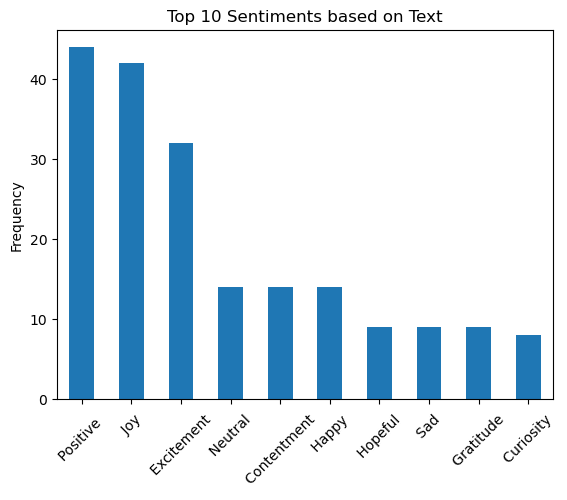

In [331]:
df['Sentiment'].value_counts().nlargest(10).plot(kind = 'bar')
plt.title('Top 10 Sentiments based on Text')
plt.ylabel('Frequency')
plt.xticks(rotation = 45)
plt.show()

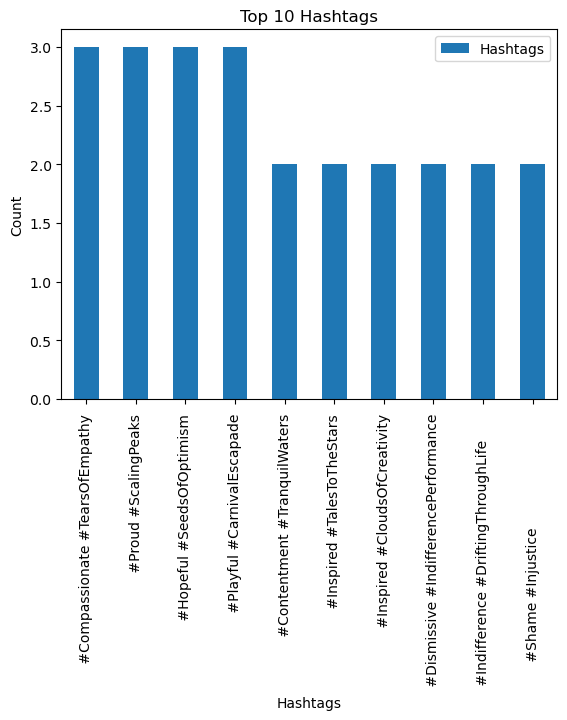

In [332]:
df["Hashtags"].value_counts().nlargest(10).plot(kind = "bar")
plt.title("Top 10 Hashtags")
plt.xlabel("Hashtags")
plt.ylabel("Count")
plt.legend()
plt.show()

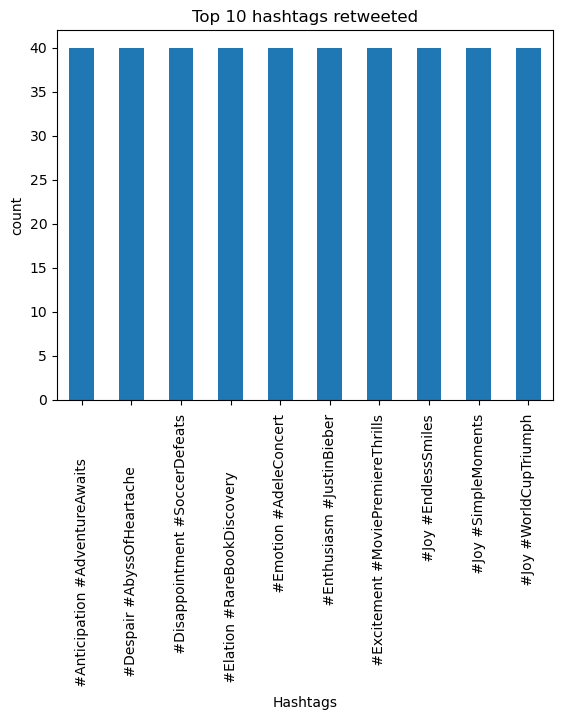

In [20]:
H_R = df.groupby("Hashtags")["Retweets"].max().nlargest(10).sort_values(ascending = False).plot(kind = "bar")
plt.title("Top 10 hashtags retweeted")
plt.ylabel("count")
plt.show()

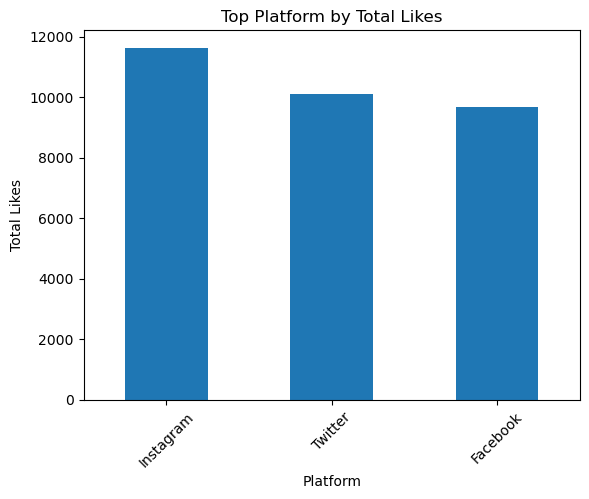

In [333]:
top_likes_platform = df.groupby("Platform")["Likes"].sum().nlargest(10)
top_likes_platform.plot(kind = "bar")
plt.title("Top Platform by Total Likes")
plt.ylabel("Total Likes")
plt.xticks(rotation = 45)
plt.show()

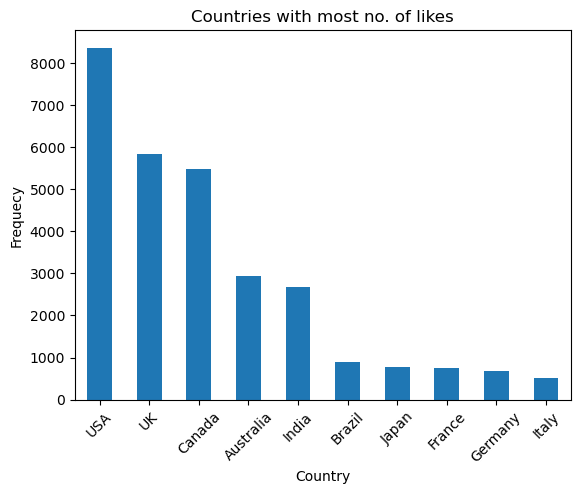

In [22]:
top_country_likes = df.groupby("Country")["Likes"].sum().nlargest(10)
top_country_likes.plot(kind = "bar")
plt.title("Countries with most no. of likes")
plt.ylabel("Frequecy")
plt.xticks(rotation = 45)
plt.show()

In [101]:
sorted_posts = df['Year'].value_counts().sort_index()

sorted_posts

2010      3
2011      4
2012      4
2013      4
2014      4
2015     19
2016     38
2017     43
2018     56
2019     73
2020     69
2021     63
2022     63
2023    289
Name: Year, dtype: int64

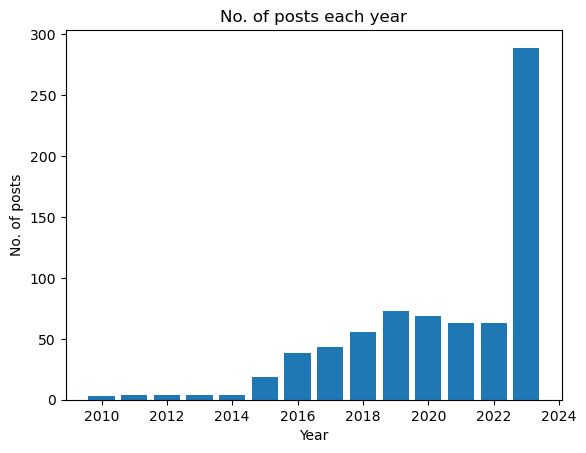

In [102]:
sorted_years = sorted_posts.index
posts_each_year = df['Year'].value_counts().sort_index().tolist()

plt.title('No. of posts each year')
plt.bar(sorted_years, posts_each_year)
plt.xlabel('Year')
plt.ylabel('No. of posts')
plt.show()

In [103]:
df['Sentiment'].unique()

array([' Positive  ', ' Negative  ', ' Neutral   ', ' Anger        ',
       ' Fear         ', ' Sadness      ', ' Disgust      ',
       ' Happiness    ', ' Joy          ', ' Love         ',
       ' Amusement    ', ' Enjoyment    ', ' Admiration   ',
       ' Affection    ', ' Awe          ', ' Disappointed ',
       ' Surprise     ', ' Acceptance   ', ' Adoration    ',
       ' Anticipation ', ' Bitter       ', ' Calmness     ',
       ' Confusion    ', ' Excitement   ', ' Kind         ',
       ' Pride        ', ' Shame        ', ' Confusion ', ' Excitement ',
       ' Shame ', ' Elation       ', ' Euphoria      ', ' Contentment   ',
       ' Serenity      ', ' Gratitude     ', ' Hope          ',
       ' Empowerment   ', ' Compassion    ', ' Tenderness    ',
       ' Arousal       ', ' Enthusiasm    ', ' Fulfillment  ',
       ' Reverence     ', ' Compassion', ' Fulfillment   ', ' Reverence ',
       ' Elation   ', ' Despair         ', ' Grief           ',
       ' Loneliness     

In [104]:
len(df['Sentiment'].unique())

279

In [105]:
df['Sentiment'] = df['Sentiment'].map(lambda x: x.strip())

print(df.head())
print('\n\n')
print(df['Sentiment'].unique())
print('\n\n')
print(len(df['Sentiment'].unique()))

                                                Text Sentiment  \
0   Enjoying a beautiful day at the park!        ...  Positive   
1   Traffic was terrible this morning.           ...  Negative   
2   Just finished an amazing workout! 💪          ...  Positive   
3   Excited about the upcoming weekend getaway!  ...  Positive   
4   Trying out a new recipe for dinner tonight.  ...   Neutral   

             Timestamp            User   Platform  \
0  2023-01-15 12:30:00   User123          Twitter   
1  2023-01-15 08:45:00   CommuterX        Twitter   
2  2023-01-15 15:45:00   FitnessFan     Instagram   
3  2023-01-15 18:20:00   AdventureX      Facebook   
4  2023-01-15 19:55:00   ChefCook       Instagram   

                                     Hashtags  Retweets  Likes    Country  \
0   #Nature #Park                                  15.0   30.0        USA   
1   #Traffic #Morning                               5.0   10.0     Canada   
2   #Fitness #Workout                              20

## Adjusting Sentiment Column

In [106]:
nltk.download("stopwords")
stemmer = nltk.SnowballStemmer("english")
stopword = set(stopwords.words("english"))

[nltk_data] Error loading stopwords: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


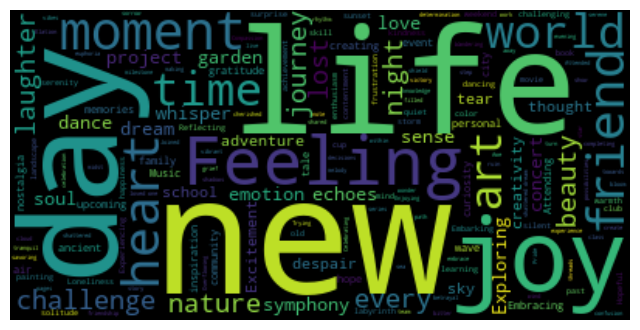

In [29]:
text = " ".join(i for i in df.Text)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords = stopwords, background_color = 'black').generate(text)
plt.figure(figsize = (8, 6))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()

In [107]:
df.head()

,Text,Sentiment,Timestamp,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour
0,Enjoying a beautiful day at the park! ...,Positive,2023-01-15 12:30:00,User123,Twitter,#Nature #Park,15.0,30.0,USA,2023,1,15,12
1,Traffic was terrible this morning. ...,Negative,2023-01-15 08:45:00,CommuterX,Twitter,#Traffic #Morning,5.0,10.0,Canada,2023,1,15,8
2,Just finished an amazing workout! 💪 ...,Positive,2023-01-15 15:45:00,FitnessFan,Instagram,#Fitness #Workout,20.0,40.0,USA,2023,1,15,15
3,Excited about the upcoming weekend getaway! ...,Positive,2023-01-15 18:20:00,AdventureX,Facebook,#Travel #Adventure,8.0,15.0,UK,2023,1,15,18
4,Trying out a new recipe for dinner tonight. ...,Neutral,2023-01-15 19:55:00,ChefCook,Instagram,#Cooking #Food,12.0,25.0,Australia,2023,1,15,19


In [108]:
cdf = df.copy()

cdf.head()

,Text,Sentiment,Timestamp,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour
0,Enjoying a beautiful day at the park! ...,Positive,2023-01-15 12:30:00,User123,Twitter,#Nature #Park,15.0,30.0,USA,2023,1,15,12
1,Traffic was terrible this morning. ...,Negative,2023-01-15 08:45:00,CommuterX,Twitter,#Traffic #Morning,5.0,10.0,Canada,2023,1,15,8
2,Just finished an amazing workout! 💪 ...,Positive,2023-01-15 15:45:00,FitnessFan,Instagram,#Fitness #Workout,20.0,40.0,USA,2023,1,15,15
3,Excited about the upcoming weekend getaway! ...,Positive,2023-01-15 18:20:00,AdventureX,Facebook,#Travel #Adventure,8.0,15.0,UK,2023,1,15,18
4,Trying out a new recipe for dinner tonight. ...,Neutral,2023-01-15 19:55:00,ChefCook,Instagram,#Cooking #Food,12.0,25.0,Australia,2023,1,15,19


In [109]:
sia = SentimentIntensityAnalyzer()

sia.polarity_scores('Happy')

{'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound': 0.5719}

In [110]:
all_sentiment_words = cdf['Sentiment'].unique().tolist()

In [111]:
pos_words = []
neg_words = []
neu_words = []

for word in all_sentiment_words:
    score = sia.polarity_scores(word)['compound']

    if score >= 0.35:
        pos_words.append(word)
    elif score <= -0.35:
        neg_words.append(word)
    else:
        neu_words.append(word)
        
print(f'Positive words:\n{pos_words}\n\nNegative words:\n{neg_words}\n\nNeutral words:\n{neu_words}\n')
print(f'Pos len: {len(pos_words)}\nNeg len: {len(neg_words)}\nNeu len: {len(neu_words)}')

Positive words:
['Positive', 'Happiness', 'Joy', 'Love', 'Amusement', 'Enjoyment', 'Admiration', 'Affection', 'Acceptance', 'Adoration', 'Calmness', 'Excitement', 'Kind', 'Elation', 'Euphoria', 'Contentment', 'Gratitude', 'Hope', 'Compassion', 'Tenderness', 'Enthusiasm', 'Determination', 'Hopeful', 'Proud', 'Grateful', 'Empathetic', 'Compassionate', 'Playful', 'Inspired', 'Confident', 'Thrill', 'Overjoyed', 'Inspiration', 'Satisfaction', 'Blessed', 'Appreciation', 'Confidence', 'Optimism', 'Elegance', 'Harmony', 'Creativity', 'Coziness', 'Freedom', 'Marvel', 'Positivity', 'Kindness', 'Friendship', 'Success', 'Amazement', 'Romance', 'Tranquility', 'Grandeur', 'Charm', 'Ecstasy', 'Engagement', 'Triumph', 'Heartwarming', 'Sympathy', 'Joy in Baking', 'Thrilling Journey', "Nature's Beauty", 'Creative Inspiration', 'Runway Creativity', "Ocean's Freedom", 'Relief', 'Happy']

Negative words:
['Negative', 'Anger', 'Fear', 'Sadness', 'Disgust', 'Disappointed', 'Bitter', 'Shame', 'Grief', 'Loneli

In [112]:
neg_words_to_move = ['Despair', 'Jealousy', 'Anxiety', 'Envious', 'Darkness', 'Desolation', 'Loss', 'Heartache']
pos_words_to_move = ['Fulfillment', 'Motivation', 'JoyfulReunion', 'Accomplishment', 'Wonderment', 'Enchantment', 
                     'PlayfulJoy', 'FestiveJoy', 'Celebration']

for neg_word in neg_words_to_move:
    index = neu_words.index(neg_word)
    del neu_words[index]

print(f'Neutral words:\n{neu_words}\n\nNeutral words length: {len(neu_words)}')

Neutral words:
['Neutral', 'Awe', 'Surprise', 'Anticipation', 'Confusion', 'Pride', 'Serenity', 'Empowerment', 'Arousal', 'Fulfillment', 'Reverence', 'Boredom', 'Envy', 'Curiosity', 'Indifference', 'Numbness', 'Nostalgia', 'Ambivalence', 'Zest', 'Free-spirited', 'Yearning', 'Apprehensive', 'Overwhelmed', 'Dismissive', 'Bittersweet', 'Motivation', 'Contemplation', 'JoyfulReunion', 'Reflection', 'Accomplishment', 'Wonderment', 'Enchantment', 'Intrigue', 'PlayfulJoy', 'Mindfulness', 'DreamChaser', 'Whimsy', 'Pensive', 'Radiance', 'Wonder', 'Rejuvenation', 'Adventure', 'Melodic', 'FestiveJoy', 'InnerJourney', 'Dazzle', 'Adrenaline', 'ArtisticBurst', 'CulinaryOdyssey', 'Resilience', 'Immersion', 'Spark', 'EmotionalStorm', 'LostLove', 'Solitude', 'Exploration', 'Captivation', 'Emotion', 'Energy', 'Celebration', 'Colorful', 'Hypnotic', 'Connection', 'Iconic', 'Journey', 'Touched', 'Suspense', 'Pressure', 'Renewed Effort', 'Miscalculation', 'Challenge', 'Solace', 'Breakthrough', 'Envisioning H

In [113]:
for pos_word in pos_words_to_move:
    index = neu_words.index(pos_word)
    del neu_words[index]

print(f'Neutral words:\n{neu_words}\n\nNeutral words length: {len(neu_words)}')

Neutral words:
['Neutral', 'Awe', 'Surprise', 'Anticipation', 'Confusion', 'Pride', 'Serenity', 'Empowerment', 'Arousal', 'Reverence', 'Boredom', 'Envy', 'Curiosity', 'Indifference', 'Numbness', 'Nostalgia', 'Ambivalence', 'Zest', 'Free-spirited', 'Yearning', 'Apprehensive', 'Overwhelmed', 'Dismissive', 'Bittersweet', 'Contemplation', 'Reflection', 'Intrigue', 'Mindfulness', 'DreamChaser', 'Whimsy', 'Pensive', 'Radiance', 'Wonder', 'Rejuvenation', 'Adventure', 'Melodic', 'InnerJourney', 'Dazzle', 'Adrenaline', 'ArtisticBurst', 'CulinaryOdyssey', 'Resilience', 'Immersion', 'Spark', 'EmotionalStorm', 'LostLove', 'Solitude', 'Exploration', 'Captivation', 'Emotion', 'Energy', 'Colorful', 'Hypnotic', 'Connection', 'Iconic', 'Journey', 'Touched', 'Suspense', 'Pressure', 'Renewed Effort', 'Miscalculation', 'Challenge', 'Solace', 'Breakthrough', 'Envisioning History', 'Imagination', 'Vibrancy', 'Mesmerizing', 'Culinary Adventure', 'Winter Magic', 'Celestial Wonder', 'Whispers of the Past', 'Mi

In [114]:
for word in pos_words_to_move:
    pos_words.append(word)

for word in neg_words_to_move:
    neg_words.append(word)
    
print(f'Pos words:\n{pos_words}\nPos words length: {len(pos_words)}\n\n')
print(f'Neg words:\n{neg_words}\nNeg words length: {len(neg_words)}')

Pos words:
['Positive', 'Happiness', 'Joy', 'Love', 'Amusement', 'Enjoyment', 'Admiration', 'Affection', 'Acceptance', 'Adoration', 'Calmness', 'Excitement', 'Kind', 'Elation', 'Euphoria', 'Contentment', 'Gratitude', 'Hope', 'Compassion', 'Tenderness', 'Enthusiasm', 'Determination', 'Hopeful', 'Proud', 'Grateful', 'Empathetic', 'Compassionate', 'Playful', 'Inspired', 'Confident', 'Thrill', 'Overjoyed', 'Inspiration', 'Satisfaction', 'Blessed', 'Appreciation', 'Confidence', 'Optimism', 'Elegance', 'Harmony', 'Creativity', 'Coziness', 'Freedom', 'Marvel', 'Positivity', 'Kindness', 'Friendship', 'Success', 'Amazement', 'Romance', 'Tranquility', 'Grandeur', 'Charm', 'Ecstasy', 'Engagement', 'Triumph', 'Heartwarming', 'Sympathy', 'Joy in Baking', 'Thrilling Journey', "Nature's Beauty", 'Creative Inspiration', 'Runway Creativity', "Ocean's Freedom", 'Relief', 'Happy', 'Fulfillment', 'Motivation', 'JoyfulReunion', 'Accomplishment', 'Wonderment', 'Enchantment', 'PlayfulJoy', 'FestiveJoy', 'Cel

In [38]:
nltk.download("vader_lexicon")
sentiments = SentimentIntensityAnalyzer()
df["Positive"] = [sentiments.polarity_scores(i)["pos"] for i in df["Text"]]
df["Negative"] = [sentiments.polarity_scores(i)["neg"] for i in df["Text"]]
df["Neutral"] = [sentiments.polarity_scores(i)["neu"] for i in df["Text"]]
df = df[["Text", "Positive", "Negative", "Neutral"]]

df.head(10)

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\KIIT\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


,Text,Positive,Negative,Neutral
0,Enjoying a beautiful day at the park! ...,0.655,0.000,0.345
1,Traffic was terrible this morning. ...,0.000,0.437,0.563
2,Just finished an amazing workout! 💪 ...,0.506,0.000,0.494
3,Excited about the upcoming weekend getaway! ...,0.350,0.000,0.650
4,Trying out a new recipe for dinner tonight. ...,0.000,0.000,1.000
5,Feeling grateful for the little things in lif...,0.429,0.000,0.571
6,Rainy days call for cozy blankets and hot coc...,0.000,0.140,0.860
7,The new movie release is a must-watch! ...,0.000,0.000,1.000
8,Political discussions heating up on the timel...,0.000,0.000,1.000
9,Missing summer vibes and beach days. ...,0.000,0.306,0.694


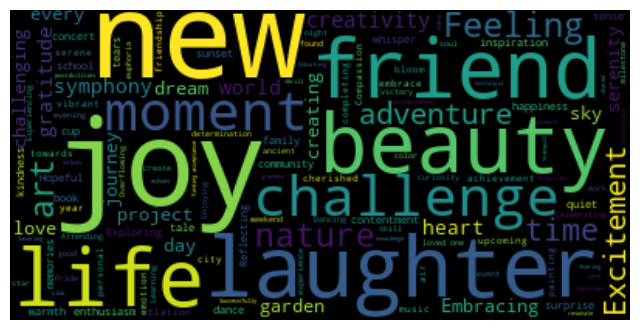

In [39]:
positive = " ".join([i for i in df["Text"][df["Positive"] > df["Negative"]]])
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords = stopwords, background_color = 'black').generate(positive)
plt.figure(figsize = (8, 6))
plt.imshow(wordcloud, interpolation = "bilinear")
plt.axis("off")
plt.show()

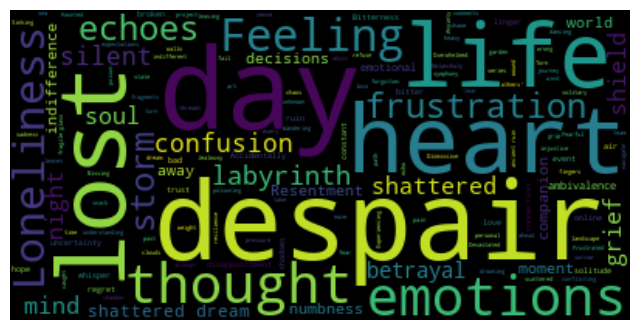

In [40]:
negative = " ".join([i for i in df['Text'][df['Negative'] > df['Positive']]])
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords = stopwords, background_color = 'black').generate(negative)
plt.figure(figsize = (8, 6))
plt.imshow(wordcloud, interpolation = "bilinear")
plt.axis("off")
plt.show()

In [115]:
cdf.head()

,Text,Sentiment,Timestamp,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour
0,Enjoying a beautiful day at the park! ...,Positive,2023-01-15 12:30:00,User123,Twitter,#Nature #Park,15.0,30.0,USA,2023,1,15,12
1,Traffic was terrible this morning. ...,Negative,2023-01-15 08:45:00,CommuterX,Twitter,#Traffic #Morning,5.0,10.0,Canada,2023,1,15,8
2,Just finished an amazing workout! 💪 ...,Positive,2023-01-15 15:45:00,FitnessFan,Instagram,#Fitness #Workout,20.0,40.0,USA,2023,1,15,15
3,Excited about the upcoming weekend getaway! ...,Positive,2023-01-15 18:20:00,AdventureX,Facebook,#Travel #Adventure,8.0,15.0,UK,2023,1,15,18
4,Trying out a new recipe for dinner tonight. ...,Neutral,2023-01-15 19:55:00,ChefCook,Instagram,#Cooking #Food,12.0,25.0,Australia,2023,1,15,19


In [116]:
cdf['Sentiment'].value_counts()

Positive          45
Joy               44
Excitement        37
Contentment       19
Neutral           18
                  ..
LostLove           1
EmotionalStorm     1
Suffering          1
Bittersweet        1
Intrigue           1
Name: Sentiment, Length: 191, dtype: int64

In [117]:
cdf[150:165]

,Text,Sentiment,Timestamp,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour
150,The euphoria of a successful product launch. ...,Euphoria,2022-04-03 11:45:00,ProductLaunchJoy,Facebook,#Euphoria #ProductLaunchSuccess,15.0,30.0,USA,2022,4,3,11
151,Contentment in the embrace of a loved one. ...,Contentment,2010-11-12 20:20:00,LovingEmbrace,Twitter,#Contentment #Love,30.0,60.0,India,2010,11,12,20
152,Serenity found in the beauty of a sunset by t...,Serenity,2011-07-22 18:30:00,SunsetWatcher2,Instagram,#Serenity #SunsetViews,22.0,45.0,Canada,2011,7,22,18
153,Gratitude for the small joys that each day br...,Gratitude,2012-03-30 11:20:00,JoyfulHeart2,Facebook,#Gratitude #SmallJoys,15.0,30.0,Australia,2012,3,30,11
154,Hopeful about the potential for personal grow...,Hope,2013-10-05 16:40:00,GrowthOptimist,Twitter,#Hope #PersonalDevelopment,18.0,35.0,UK,2013,10,5,16
155,Empowerment through learning a new skill. ...,Empowerment,2014-07-10 13:15:00,SkillEmpower,Instagram,#Empowerment #SkillBuilding,25.0,50.0,India,2014,7,10,13
156,Compassion in volunteering for a local charit...,Compassion,2015-12-18 14:20:00,CharityVolunteer,Facebook,#Compassion #VolunteerWork,18.0,35.0,USA,2015,12,18,14
157,Tenderness in a quiet moment shared with a pe...,Tenderness,2016-02-10 19:45:00,PetLove,Twitter,#Tenderness #PetLove,25.0,50.0,Canada,2016,2,10,19
158,Arousal of excitement for an upcoming festiva...,Arousal,2017-09-25 11:30:00,FestivalFan,Instagram,#Arousal #FestivalExcitement,20.0,40.0,UK,2017,9,25,11
159,Enthusiasm for a DIY home improvement project...,Enthusiasm,2018-04-15 16:00:00,DIYEnthusiast,Facebook,#Enthusiasm #HomeImprovement,15.0,30.0,Australia,2018,4,15,16


In [118]:
cdf['Sentiment'] = cdf['Sentiment'].map(lambda x: "Positive" if x in pos_words else x)
print(f'Pos words:\n{pos_words}\n\n')

cdf[150:165]

Pos words:
['Positive', 'Happiness', 'Joy', 'Love', 'Amusement', 'Enjoyment', 'Admiration', 'Affection', 'Acceptance', 'Adoration', 'Calmness', 'Excitement', 'Kind', 'Elation', 'Euphoria', 'Contentment', 'Gratitude', 'Hope', 'Compassion', 'Tenderness', 'Enthusiasm', 'Determination', 'Hopeful', 'Proud', 'Grateful', 'Empathetic', 'Compassionate', 'Playful', 'Inspired', 'Confident', 'Thrill', 'Overjoyed', 'Inspiration', 'Satisfaction', 'Blessed', 'Appreciation', 'Confidence', 'Optimism', 'Elegance', 'Harmony', 'Creativity', 'Coziness', 'Freedom', 'Marvel', 'Positivity', 'Kindness', 'Friendship', 'Success', 'Amazement', 'Romance', 'Tranquility', 'Grandeur', 'Charm', 'Ecstasy', 'Engagement', 'Triumph', 'Heartwarming', 'Sympathy', 'Joy in Baking', 'Thrilling Journey', "Nature's Beauty", 'Creative Inspiration', 'Runway Creativity', "Ocean's Freedom", 'Relief', 'Happy', 'Fulfillment', 'Motivation', 'JoyfulReunion', 'Accomplishment', 'Wonderment', 'Enchantment', 'PlayfulJoy', 'FestiveJoy', 'Cel

,Text,Sentiment,Timestamp,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour
150,The euphoria of a successful product launch. ...,Positive,2022-04-03 11:45:00,ProductLaunchJoy,Facebook,#Euphoria #ProductLaunchSuccess,15.0,30.0,USA,2022,4,3,11
151,Contentment in the embrace of a loved one. ...,Positive,2010-11-12 20:20:00,LovingEmbrace,Twitter,#Contentment #Love,30.0,60.0,India,2010,11,12,20
152,Serenity found in the beauty of a sunset by t...,Serenity,2011-07-22 18:30:00,SunsetWatcher2,Instagram,#Serenity #SunsetViews,22.0,45.0,Canada,2011,7,22,18
153,Gratitude for the small joys that each day br...,Positive,2012-03-30 11:20:00,JoyfulHeart2,Facebook,#Gratitude #SmallJoys,15.0,30.0,Australia,2012,3,30,11
154,Hopeful about the potential for personal grow...,Positive,2013-10-05 16:40:00,GrowthOptimist,Twitter,#Hope #PersonalDevelopment,18.0,35.0,UK,2013,10,5,16
155,Empowerment through learning a new skill. ...,Empowerment,2014-07-10 13:15:00,SkillEmpower,Instagram,#Empowerment #SkillBuilding,25.0,50.0,India,2014,7,10,13
156,Compassion in volunteering for a local charit...,Positive,2015-12-18 14:20:00,CharityVolunteer,Facebook,#Compassion #VolunteerWork,18.0,35.0,USA,2015,12,18,14
157,Tenderness in a quiet moment shared with a pe...,Positive,2016-02-10 19:45:00,PetLove,Twitter,#Tenderness #PetLove,25.0,50.0,Canada,2016,2,10,19
158,Arousal of excitement for an upcoming festiva...,Arousal,2017-09-25 11:30:00,FestivalFan,Instagram,#Arousal #FestivalExcitement,20.0,40.0,UK,2017,9,25,11
159,Enthusiasm for a DIY home improvement project...,Positive,2018-04-15 16:00:00,DIYEnthusiast,Facebook,#Enthusiasm #HomeImprovement,15.0,30.0,Australia,2018,4,15,16


In [119]:
print(f'Neg words:{neg_words}\n')

cdf['Sentiment'] = cdf['Sentiment'].map(lambda x: "Negative" if x in neg_words else x)
cdf[150:165]

Neg words:['Negative', 'Anger', 'Fear', 'Sadness', 'Disgust', 'Disappointed', 'Bitter', 'Shame', 'Grief', 'Loneliness', 'Resentment', 'Frustration', 'Intimidation', 'Helplessness', 'Regret', 'Melancholy', 'Bitterness', 'Fearful', 'Jealous', 'Devastated', 'Frustrated', 'Heartbreak', 'Betrayal', 'Suffering', 'Isolation', 'Disappointment', 'Exhaustion', 'Sorrow', 'Desperation', 'Ruins', 'Obstacle', 'Embarrassed', 'Sad', 'Hate', 'Bad', 'Despair', 'Jealousy', 'Anxiety', 'Envious', 'Darkness', 'Desolation', 'Loss', 'Heartache']



,Text,Sentiment,Timestamp,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour
150,The euphoria of a successful product launch. ...,Positive,2022-04-03 11:45:00,ProductLaunchJoy,Facebook,#Euphoria #ProductLaunchSuccess,15.0,30.0,USA,2022,4,3,11
151,Contentment in the embrace of a loved one. ...,Positive,2010-11-12 20:20:00,LovingEmbrace,Twitter,#Contentment #Love,30.0,60.0,India,2010,11,12,20
152,Serenity found in the beauty of a sunset by t...,Serenity,2011-07-22 18:30:00,SunsetWatcher2,Instagram,#Serenity #SunsetViews,22.0,45.0,Canada,2011,7,22,18
153,Gratitude for the small joys that each day br...,Positive,2012-03-30 11:20:00,JoyfulHeart2,Facebook,#Gratitude #SmallJoys,15.0,30.0,Australia,2012,3,30,11
154,Hopeful about the potential for personal grow...,Positive,2013-10-05 16:40:00,GrowthOptimist,Twitter,#Hope #PersonalDevelopment,18.0,35.0,UK,2013,10,5,16
155,Empowerment through learning a new skill. ...,Empowerment,2014-07-10 13:15:00,SkillEmpower,Instagram,#Empowerment #SkillBuilding,25.0,50.0,India,2014,7,10,13
156,Compassion in volunteering for a local charit...,Positive,2015-12-18 14:20:00,CharityVolunteer,Facebook,#Compassion #VolunteerWork,18.0,35.0,USA,2015,12,18,14
157,Tenderness in a quiet moment shared with a pe...,Positive,2016-02-10 19:45:00,PetLove,Twitter,#Tenderness #PetLove,25.0,50.0,Canada,2016,2,10,19
158,Arousal of excitement for an upcoming festiva...,Arousal,2017-09-25 11:30:00,FestivalFan,Instagram,#Arousal #FestivalExcitement,20.0,40.0,UK,2017,9,25,11
159,Enthusiasm for a DIY home improvement project...,Positive,2018-04-15 16:00:00,DIYEnthusiast,Facebook,#Enthusiasm #HomeImprovement,15.0,30.0,Australia,2018,4,15,16


In [46]:
nltk.download("vader_lexicon")
sentiments = SentimentIntensityAnalyzer()
cdf["Positive"] = [sentiments.polarity_scores(i)["pos"] for i in cdf["Text"]]
cdf["Negative"] = [sentiments.polarity_scores(i)["neg"] for i in cdf["Text"]]
cdf["Neutral"] = [sentiments.polarity_scores(i)["neu"] for i in cdf["Text"]]
cdf = cdf[["Text", "Positive", "Negative", "Neutral"]]

df.head(10)

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\KIIT\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


,Text,Positive,Negative,Neutral
0,Enjoying a beautiful day at the park! ...,0.655,0.000,0.345
1,Traffic was terrible this morning. ...,0.000,0.437,0.563
2,Just finished an amazing workout! 💪 ...,0.506,0.000,0.494
3,Excited about the upcoming weekend getaway! ...,0.350,0.000,0.650
4,Trying out a new recipe for dinner tonight. ...,0.000,0.000,1.000
5,Feeling grateful for the little things in lif...,0.429,0.000,0.571
6,Rainy days call for cozy blankets and hot coc...,0.000,0.140,0.860
7,The new movie release is a must-watch! ...,0.000,0.000,1.000
8,Political discussions heating up on the timel...,0.000,0.000,1.000
9,Missing summer vibes and beach days. ...,0.000,0.306,0.694


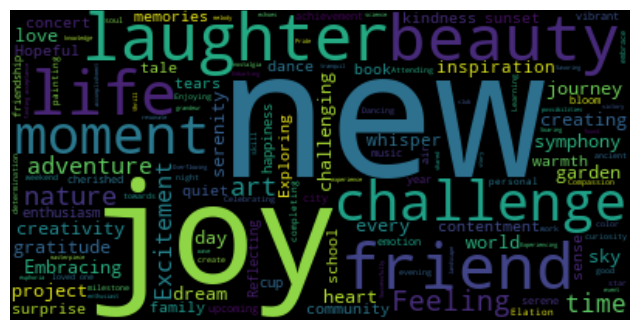

In [47]:
pos = " ".join([i for i in cdf["Text"][cdf["Positive"] > cdf["Negative"]]])
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords = stopwords, background_color = 'black').generate(pos)
plt.figure(figsize = (8, 6))
plt.imshow(wordcloud, interpolation = "bilinear")
plt.axis("off")
plt.show()

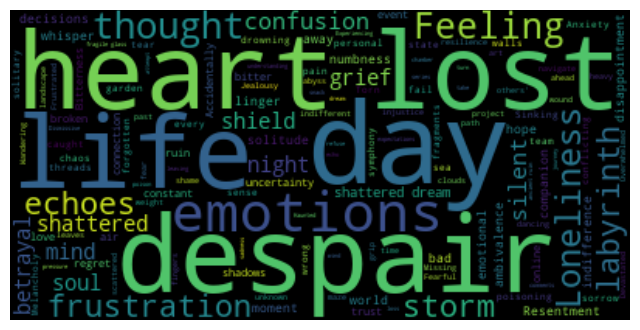

In [48]:
neg = " ".join([i for i in cdf["Text"][cdf['Negative'] > cdf['Positive']]])
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords = stopwords, background_color = 'black').generate(neg)
plt.figure(figsize = (8, 6))
plt.imshow(wordcloud, interpolation = "bilinear")
plt.axis("off")
plt.show()

In [120]:
cdf['Sentiment'] = cdf['Sentiment'].map(lambda x: "Neutral" if x in neu_words else x)

cdf[150:165]

,Text,Sentiment,Timestamp,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour
150,The euphoria of a successful product launch. ...,Positive,2022-04-03 11:45:00,ProductLaunchJoy,Facebook,#Euphoria #ProductLaunchSuccess,15.0,30.0,USA,2022,4,3,11
151,Contentment in the embrace of a loved one. ...,Positive,2010-11-12 20:20:00,LovingEmbrace,Twitter,#Contentment #Love,30.0,60.0,India,2010,11,12,20
152,Serenity found in the beauty of a sunset by t...,Neutral,2011-07-22 18:30:00,SunsetWatcher2,Instagram,#Serenity #SunsetViews,22.0,45.0,Canada,2011,7,22,18
153,Gratitude for the small joys that each day br...,Positive,2012-03-30 11:20:00,JoyfulHeart2,Facebook,#Gratitude #SmallJoys,15.0,30.0,Australia,2012,3,30,11
154,Hopeful about the potential for personal grow...,Positive,2013-10-05 16:40:00,GrowthOptimist,Twitter,#Hope #PersonalDevelopment,18.0,35.0,UK,2013,10,5,16
155,Empowerment through learning a new skill. ...,Neutral,2014-07-10 13:15:00,SkillEmpower,Instagram,#Empowerment #SkillBuilding,25.0,50.0,India,2014,7,10,13
156,Compassion in volunteering for a local charit...,Positive,2015-12-18 14:20:00,CharityVolunteer,Facebook,#Compassion #VolunteerWork,18.0,35.0,USA,2015,12,18,14
157,Tenderness in a quiet moment shared with a pe...,Positive,2016-02-10 19:45:00,PetLove,Twitter,#Tenderness #PetLove,25.0,50.0,Canada,2016,2,10,19
158,Arousal of excitement for an upcoming festiva...,Neutral,2017-09-25 11:30:00,FestivalFan,Instagram,#Arousal #FestivalExcitement,20.0,40.0,UK,2017,9,25,11
159,Enthusiasm for a DIY home improvement project...,Positive,2018-04-15 16:00:00,DIYEnthusiast,Facebook,#Enthusiasm #HomeImprovement,15.0,30.0,Australia,2018,4,15,16


In [121]:
cdf['Sentiment'].value_counts()

Positive    360
Neutral     212
Negative    160
Name: Sentiment, dtype: int64

In [122]:
num_sentiments = {
    "Positive": 0,
    "Negative": 1,
    "Neutral": 2
}

print(cdf.head())
print('\n')

cdf['Sentiment'] = cdf['Sentiment'].replace(num_sentiments)
cdf.head(200)

                                                Text Sentiment  \
0   Enjoying a beautiful day at the park!        ...  Positive   
1   Traffic was terrible this morning.           ...  Negative   
2   Just finished an amazing workout! 💪          ...  Positive   
3   Excited about the upcoming weekend getaway!  ...  Positive   
4   Trying out a new recipe for dinner tonight.  ...   Neutral   

             Timestamp            User   Platform  \
0  2023-01-15 12:30:00   User123          Twitter   
1  2023-01-15 08:45:00   CommuterX        Twitter   
2  2023-01-15 15:45:00   FitnessFan     Instagram   
3  2023-01-15 18:20:00   AdventureX      Facebook   
4  2023-01-15 19:55:00   ChefCook       Instagram   

                                     Hashtags  Retweets  Likes    Country  \
0   #Nature #Park                                  15.0   30.0        USA   
1   #Traffic #Morning                               5.0   10.0     Canada   
2   #Fitness #Workout                              20

,Text,Sentiment,Timestamp,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour
0,Enjoying a beautiful day at the park! ...,0,2023-01-15 12:30:00,User123,Twitter,#Nature #Park,15.0,30.0,USA,2023,1,15,12
1,Traffic was terrible this morning. ...,1,2023-01-15 08:45:00,CommuterX,Twitter,#Traffic #Morning,5.0,10.0,Canada,2023,1,15,8
2,Just finished an amazing workout! 💪 ...,0,2023-01-15 15:45:00,FitnessFan,Instagram,#Fitness #Workout,20.0,40.0,USA,2023,1,15,15
3,Excited about the upcoming weekend getaway! ...,0,2023-01-15 18:20:00,AdventureX,Facebook,#Travel #Adventure,8.0,15.0,UK,2023,1,15,18
4,Trying out a new recipe for dinner tonight. ...,2,2023-01-15 19:55:00,ChefCook,Instagram,#Cooking #Food,12.0,25.0,Australia,2023,1,15,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,"Boredom lingers, a stagnant pool of indiffere...",2,2021-10-02 19:00:00,StagnantHeart,Facebook,#Boredom #Stagnation,7.0,15.0,Canada,2021,10,2,19
196,"Embarking on a journey of discovery, fueled b...",2,2023-04-15 10:15:00,InquisitiveMind,Twitter,#Curiosity #Learning,15.0,30.0,USA,2023,4,15,10
197,"Lost in the vast sea of information, an indif...",2,2022-11-28 17:30:00,ApatheticObserver,Instagram,#Indifference #DigitalOverload,7.0,15.0,Canada,2022,11,28,17
198,The complex puzzle of life leaves me in a sta...,2,2020-04-02 09:45:00,SeekingClarity,Facebook,#Confusion #LifePuzzle,10.0,20.0,UK,2020,4,2,9


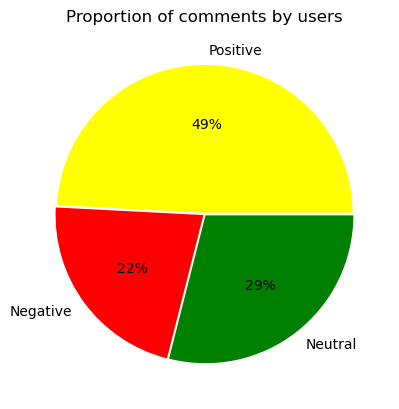

In [123]:
pos = cdf.loc[cdf['Sentiment'] == 0].count()[0]
neg = cdf.loc[cdf['Sentiment'] == 1].count()[0]
neu = cdf.loc[cdf['Sentiment'] == 2].count()[0]

labels = ['Positive', 'Negative', 'Neutral']
colors = ['Yellow', 'Red', 'Green']
explode = [0.01, 0.01, 0.01]

plt.pie([pos, neg, neu], labels = labels, colors = colors, autopct = '%0.0f%%', explode = explode)
plt.title('Proportion of comments by users')
plt.show()

In [124]:
cdf['Total Words'] = cdf['Text'].apply(lambda x: len(x.split()))

def count_total_words(text):
    char = 0
    for word in text.split():
        char += len(word)
    
    return char

cdf['Total Chars'] = cdf['Text'].apply(count_total_words)

In [125]:
cdf.head()

,Text,Sentiment,Timestamp,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour,Total Words,Total Chars
0,Enjoying a beautiful day at the park! ...,0,2023-01-15 12:30:00,User123,Twitter,#Nature #Park,15.0,30.0,USA,2023,1,15,12,7,31
1,Traffic was terrible this morning. ...,1,2023-01-15 08:45:00,CommuterX,Twitter,#Traffic #Morning,5.0,10.0,Canada,2023,1,15,8,5,30
2,Just finished an amazing workout! 💪 ...,0,2023-01-15 15:45:00,FitnessFan,Instagram,#Fitness #Workout,20.0,40.0,USA,2023,1,15,15,6,30
3,Excited about the upcoming weekend getaway! ...,0,2023-01-15 18:20:00,AdventureX,Facebook,#Travel #Adventure,8.0,15.0,UK,2023,1,15,18,6,38
4,Trying out a new recipe for dinner tonight. ...,2,2023-01-15 19:55:00,ChefCook,Instagram,#Cooking #Food,12.0,25.0,Australia,2023,1,15,19,8,36


C:\Users\KIIT\AppData\Local\Temp\ipykernel_5884\1295743241.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x = cdf['Total Words'], hue = cdf['Sentiment'], palette = 'winter', shade = True)


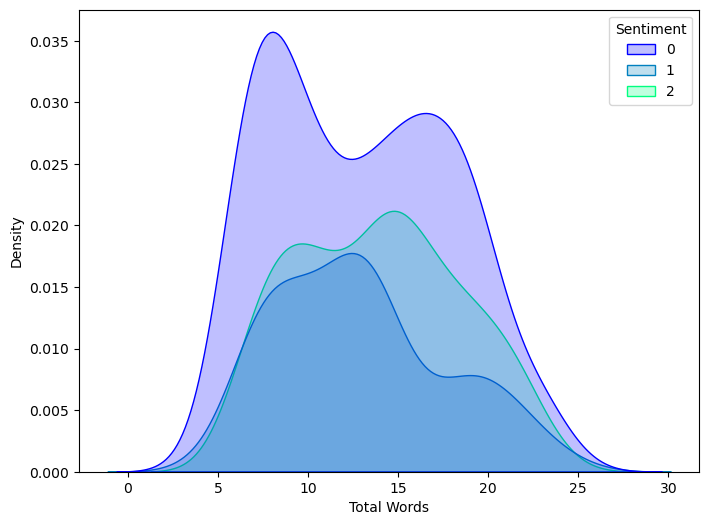

In [84]:
plt.figure(figsize = (8, 6))
sns.kdeplot(x = cdf['Total Words'], hue = cdf['Sentiment'], palette = 'winter', shade = True)
plt.show()

C:\Users\KIIT\AppData\Local\Temp\ipykernel_5884\3656131280.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x = cdf['Total Chars'], hue = cdf['Sentiment'], palette = 'winter', shade = True)


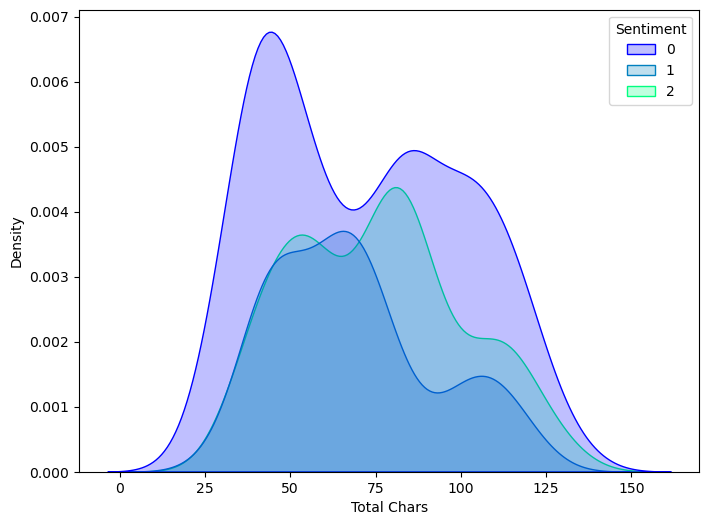

In [85]:
plt.figure(figsize = (8, 6))
sns.kdeplot(x = cdf['Total Chars'], hue = cdf['Sentiment'], palette = 'winter', shade = True)
plt.show()

## Model creation and training

In [126]:
def clean(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = [word for word in text.split(' ') if word not in stopword]
    text=" ".join(text)
    text = [stemmer.stem(word) for word in text.split(' ')]
    text=" ".join(text)
    
    return text

cdf["Text"] = cdf["Text"].apply(clean)

In [127]:
def no_spam(text):
    if 'subscri' in text:
        text = ''
    
    return text

cdf['Text'] = cdf['Text'].apply(no_spam)

In [42]:
def demoji(text):
    pattern = '😤|😡|😠|😑|🙄|🤨|😶|😱|🙀|😲|😓|😰|😢|😥|😭|😪|🤕|😔|😣|🙁|😒|😖|😕|🥴|🤒|☹️|😞|😷|🤧|😧|😨|😩|🥺|😦|😆|😀|🤭|🤩|😌|🥰|😁|😘|😂|😅|😊|😝|😙|😇'
        
    for word in text:    
        if re.match(pattern, word):
            continue
            
        text = text.replace(word, re.sub('[^\x00-\x7f]','', word)).strip()
        return text

cdf['Text'] = cdf['Text'].apply(demoji)

In [43]:
def convert(text):
    d = {'😤':'frustrated','😡':'angry','😠':'angry','😱':'horrified','🙀':'shock','😲':'shock','🙄':'disapproval',
         '🤨':'suspicion','😶':'disappointment','😓':'sad','😰':'sad','😢':'sad','😥':'sad','😭':'sad','😪':'sad',
         '🤕':'sad','😔':'sad','😣':'sad','🙁':'sad','😒':'sad','😖':'sad','😕':'sad','🥴':'sad','🤒':'sad','☹️':'sad',
         '😞':'sad','😷':'sick','🤧':'sick','😧':'sad','😨':'sad','😩':'sad','🥺':'sad','😦':'sad','😫':'sad',
         '😆':'happy','😀':'smile','🤭':'embarrassment','🤩':'exciting','🥰':'affection','😁':'smile','😂':'laugh',
         '😅':'nervousness','😊':'smile','😝':'fun','😙':'affection','😇':'blessed'}
    
    for emoji, sentiment in d.items():
        text = text.replace(emoji, sentiment)
    
    return text

cdf['senti_text'] = df['Text'].apply(convert)

In [44]:
sentiments = SentimentIntensityAnalyzer()
cdf["Positive"] = [sentiments.polarity_scores(i)["pos"] for i in cdf["Text"]]
cdf["Negative"] = [sentiments.polarity_scores(i)["neg"] for i in cdf["Text"]]
cdf["Neutral"] = [sentiments.polarity_scores(i)["neu"] for i in cdf["Text"]]
cdf = cdf[["Text", "Positive", "Negative", "Neutral"]]

cdf.head(10)

,Text,Positive,Negative,Neutral
0,enjoy beauti day park,0.516,0.000,0.484
1,traffic terribl morn,0.000,0.000,1.000
2,finish amaz workout 💪,0.000,0.000,1.000
3,excit upcom weekend getaway,0.000,0.000,1.000
4,tri new recip dinner tonight,0.000,0.000,1.000
5,feel grate littl thing life,0.000,0.000,1.000
6,raini day call cozi blanket hot cocoa,0.000,0.000,1.000
7,new movi releas mustwatch,0.000,0.000,1.000
8,polit discuss heat timelin,0.000,0.000,1.000
9,miss summer vibe beach day,0.000,0.286,0.714


In [128]:
x = sum(cdf['Sentiment'] == 0)
y = sum(cdf['Sentiment'] == 1)
z = sum(cdf['Sentiment'] == 2)

def sentiment_score(a, b, c):
    if (a > b) and (a > c):
        print("Positive 😊 ")
    elif (b>a) and (b>c):
        print("Negative 😠 ")
    else:
        print("Neutral 🙂 ")
        
sentiment_score(x, y, z)

Positive 😊 


#### From this we conclude that most of the comments by users in Social Media are Positive sentiment. We can also see it from the above graph.

In [129]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional
from tensorflow.keras.callbacks import EarlyStopping, TensorBoard

text = cdf['Text']
sentiment = cdf['Sentiment']

tokenizer = Tokenizer(num_words=1000)
tokenizer.fit_on_texts(text)
sequences = tokenizer.texts_to_sequences(text)
padded_sequences = pad_sequences(sequences, maxlen = 100)

model = Sequential()
model.add(Embedding(1000, 128, input_length = 100))
model.add(Bidirectional(LSTM(64, return_sequences = True)))
model.add(Bidirectional(LSTM(32)))
model.add(Dense(3, activation = "sigmoid"))

early_stopping = EarlyStopping(monitor = 'val_accuracy', patience = 3) 
tensorboard = TensorBoard(log_dir = './logs', histogram_freq = 1)

model.compile(loss = "sparse_categorical_crossentropy", optimizer = "adam", metrics = ["accuracy"])
history = model.fit(padded_sequences, sentiment, epochs = 4, validation_split = 0.2, callbacks = [early_stopping, tensorboard])

Epoch 1/4


19/19 [==============================] - 12s 178ms/step - loss: 1.0578 - accuracy: 0.4581 - val_loss: 0.9849 - val_accuracy: 0.6190
Epoch 2/4
19/19 [==============================] - 2s 88ms/step - loss: 0.9875 - accuracy: 0.4632 - val_loss: 0.9291 - val_accuracy: 0.6122
Epoch 3/4
19/19 [==============================] - 2s 92ms/step - loss: 0.5985 - accuracy: 0.7607 - val_loss: 1.2923 - val_accuracy: 0.3673
Epoch 4/4
19/19 [==============================] - 2s 92ms/step - loss: 0.4065 - accuracy: 0.8496 - val_loss: 1.1752 - val_accuracy: 0.4966


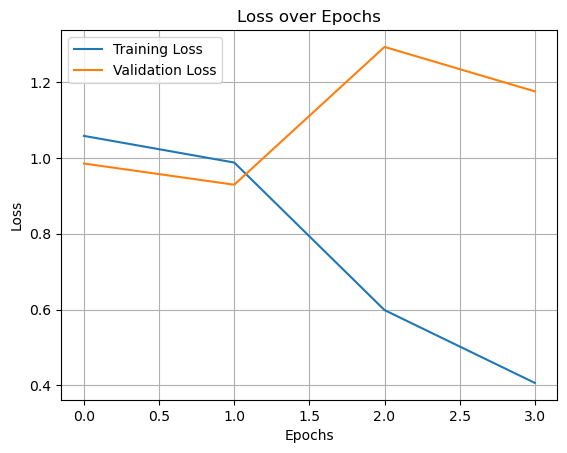

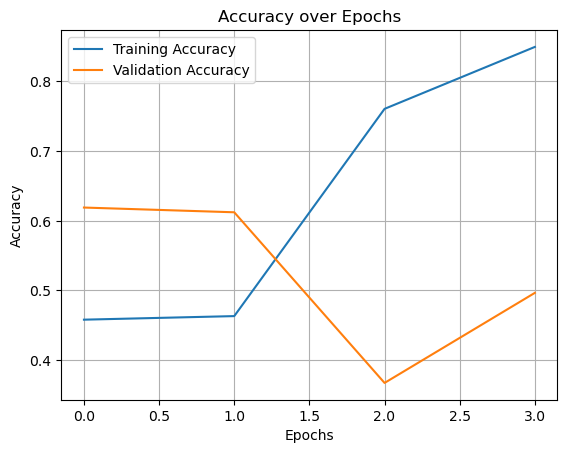

In [130]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

23/23 [==============================] - 1s 44ms/step - loss: 0.4336 - accuracy: 0.8593
Test Accuracy: 85.93%
23/23 [==============================] - 3s 34ms/step

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.90      0.91       360
           1       0.92      0.77      0.84       160
           2       0.74      0.86      0.80       212

    accuracy                           0.86       732
   macro avg       0.86      0.84      0.85       732
weighted avg       0.87      0.86      0.86       732



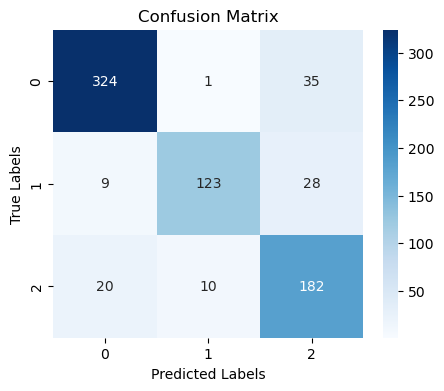

In [131]:
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping, TensorBoard
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.metrics import classification_report, confusion_matrix

test_text = cdf['Text']
test_sentiment = cdf['Sentiment']

test_sequences = tokenizer.texts_to_sequences(test_text)
padded_test_sequences = pad_sequences(test_sequences, maxlen = 100)

early_stopping = EarlyStopping(monitor = 'val_accuracy', patience = 3)
tensorboard = TensorBoard(log_dir = './logs', histogram_freq = 1)

test_loss, test_acc = model.evaluate(padded_test_sequences, test_sentiment)
print(f'Test Accuracy: {round(test_acc*100, 2)}%')

test_predictions = model.predict(padded_test_sequences)
test_pred_classes = tf.math.argmax(test_predictions, axis=1).numpy()

print("\nClassification Report:")
print(classification_report(test_sentiment, test_pred_classes))

cm = confusion_matrix(test_sentiment, test_pred_classes)

plt.figure(figsize = (5, 4))
sns.heatmap(cm, annot = True, fmt = 'd', cmap = 'Blues', xticklabels = ['0', '1', '2'], yticklabels = ['0', '1', '2'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

## Model Deployment

In [132]:
from textblob import TextBlob

def predict_sentiment(text):
    blob = TextBlob(text)
    sentiment = blob.sentiment.polarity

    if sentiment > 0.35:
        return "Positive"
    elif sentiment < -0.35:
        return "Negative"
    else:
        return "Neutral"

while True:
    text = input("Enter a sentence (or type 'quit' to exit): ")

    if text.lower() == "quit":
        break
        
    sentiment = predict_sentiment(text)
    print(f"The sentiment of the sentence is: {sentiment}")
    
print("Exiting the sentiment prediction model.")

Enter a sentence (or type 'quit' to exit): I am very happy
The sentiment of the sentence is: Positive
Enter a sentence (or type 'quit' to exit): quit
Exiting the sentiment prediction model.
